**Model Nomination for Malware Detection using Memory Artifacts**


Ibrahim Mutala Muhammad
Dec 25th, 2023

NOTE: This work was built on the work of Jonathan Cole


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cic-malmem-2022/Obfuscated-MalMem2022.csv


**About Dataset**

Overview:

Dataset overvew¶
The dataset used for model estimation is a pre-labeled collection of plugin utility outputs from the Volality memory analysis framework (ref: https://volatility3.readthedocs.io). The plugins examine patterns to identify locations in memory where process, network, and similar information is stored and return the associated data for analysis. The outputs have been pre-formated into associated feature columns and encoded in a numeric representation. The features are explained in the following section.

Dataset source: https://www.unb.ca/cic/datasets/malmem-2022.html
Dataset source paper: https://pdfs.semanticscholar.org/b2e2/0dc7a34753311472a5f2314fbf866d7eddd0.pdf


Content
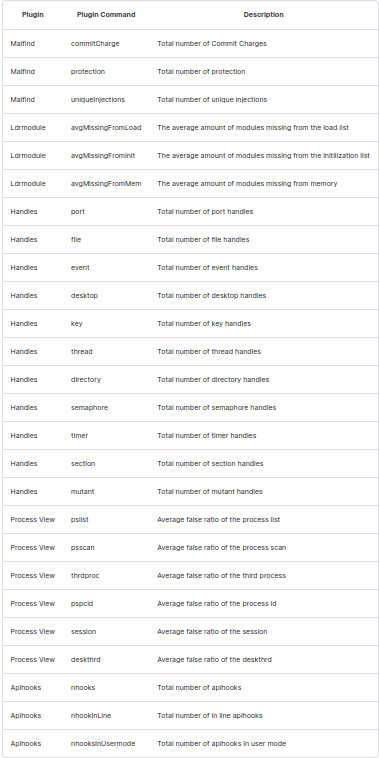


In [ ]:
# load the dataset from local file
file = '/kaggle/input/cic-malmem-2022/Obfuscated-MalMem2022.csv'
data = pd.read_csv(file)

data.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [ ]:
# Examine statistical summary data for each feature
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pslist.nproc,58596.0,41.394771,5.777249,21.000000,40.000000,41.000000,43.000000,2.400000e+02
pslist.nppid,58596.0,14.713837,2.656748,8.000000,12.000000,15.000000,16.000000,7.200000e+01
pslist.avg_threads,58596.0,11.341655,1.588231,1.650000,9.972973,11.000000,12.861955,1.681818e+01
pslist.nprocs64bit,58596.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
pslist.avg_handlers,58596.0,247.509819,111.857790,34.962500,208.725000,243.963710,289.974322,2.484595e+04
dlllist.ndlls,58596.0,1810.805447,329.782639,670.000000,1556.000000,1735.000000,2087.000000,3.443000e+03
dlllist.avg_dlls_per_proc,58596.0,43.707806,5.742023,7.333333,38.833333,42.781524,49.605280,5.317073e+01
handles.nhandles,58596.0,10258.584221,4866.864130,3514.000000,8393.000000,9287.500000,12193.000000,1.047310e+06
handles.avg_handles_per_proc,58596.0,249.560958,145.999866,71.139241,209.648228,247.208951,291.355050,3.378419e+04
handles.nport,58596.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [ ]:
# Identify feature data types and check for any null values (compare Non-Null count to dataset length)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

**Feature Reduction**

Given the high amount of features present, options for feature reduction will be examined to improve model performance (less CPU, memory, dimenisionality) and allow the model to focus on the most relevant data.

Note that in the prior step, all data types are already numeric except for Class and Category, so no encoding techniques will be required for conversion. Class and Category will be examined to potentially serve as target labels based on their descriptive names.



**Examining features based on unique value counts**

Features with without unique value variance do not aid in classification.

In [ ]:
for feature in data.columns:

    # Get the number of unique vales for the feature
    unique_count = data[feature].nunique()

    # Print the feature with unique value counts
    if unique_count == 1:
        print(f'{feature} : {unique_count} <--------------------- Removal Candidate')
    else:
        print(f'{feature} : {unique_count}')

Category : 28346
pslist.nproc : 114
pslist.nppid : 49
pslist.avg_threads : 27885
pslist.nprocs64bit : 1 <--------------------- Removal Candidate
pslist.avg_handlers : 36463
dlllist.ndlls : 1860
dlllist.avg_dlls_per_proc : 16319
handles.nhandles : 7674
handles.avg_handles_per_proc : 36144
handles.nport : 1 <--------------------- Removal Candidate
handles.nfile : 1149
handles.nevent : 3469
handles.ndesktop : 64
handles.nkey : 1100
handles.nthread : 1170
handles.ndirectory : 108
handles.nsemaphore : 638
handles.ntimer : 129
handles.nsection : 629
handles.nmutant : 408
ldrmodules.not_in_load : 151
ldrmodules.not_in_init : 185
ldrmodules.not_in_mem : 151
ldrmodules.not_in_load_avg : 18673
ldrmodules.not_in_init_avg : 18838
ldrmodules.not_in_mem_avg : 18673
malfind.ninjections : 120
malfind.commitCharge : 559
malfind.protection : 215
malfind.uniqueInjections : 5526
psxview.not_in_pslist : 41
psxview.not_in_eprocess_pool : 2
psxview.not_in_ethread_pool : 84
psxview.not_in_pspcid_list : 43
psx

In [ ]:
for each in ['handles.nport', 'pslist.nprocs64bit', 'svcscan.interactive_process_services']:
    print(data[each].value_counts())
    print('')

handles.nport
0    58596
Name: count, dtype: int64

pslist.nprocs64bit
0    58596
Name: count, dtype: int64

svcscan.interactive_process_services
0    58596
Name: count, dtype: int64



In [ ]:
data.drop(['handles.nport', 'pslist.nprocs64bit', 'svcscan.interactive_process_services'], axis=1, inplace=True)

**Encode Object Labels**

Examining the candidate Class and Category object-type features.

In [ ]:
# Examine the Class feature values
data['Class'].value_counts()

Class
Benign     29298
Malware    29298
Name: count, dtype: int64

In [ ]:
# Encode with binary values
data['Class'].replace({'Benign':0, 'Malware':1}, inplace=True)

In [ ]:
# Confirm the Class feature encoding
data['Class'].value_counts()

Class
0    29298
1    29298
Name: count, dtype: int64

In [ ]:
# Examing the values for Category feature.
data['Category'].value_counts()

Category
Benign                                                                                     29298
Spyware-Gator-1bdcd3b777965f67678748d2577b119a275aca9aed9549d45e64e692a54a7b5e-1.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-2.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-10.raw          2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-1.raw           2
                                                                                           ...  
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-6.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-5.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-4.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-3.raw           1
Ransomware-Shade-955d

**Feature Engineering**

The Category feature contain data that could be useful, but will need to be parsed to extract the useful data into two new fields, Cat1 and Cat2.

Regex will be used to split the Category feature on the '-' character, extracting the first field as Cat1 and the second field as Cat2, and ignoring the remainder.

e.g., Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-3.raw results in Cat1: Spyware, Cat2: Gator

In [ ]:
# Extract substrings as new feature values
data[['Cat1', 'Cat2']] = data['Category'].str.extract('(\w+)-(\w+)-.*', expand=True)

# Fields for Cat1 and Cat2 that did not match the regex (such as Benign values) result in nulls. Filling nulls as benign to correct
data[['Cat1', 'Cat2']] = data[['Cat1', 'Cat2']].fillna('Benign')

In [ ]:
# Verify resultant values are as expected
data[['Cat1', 'Cat2']]

,Cat1,Cat2
0,Benign,Benign
1,Benign,Benign
2,Benign,Benign
3,Benign,Benign
4,Benign,Benign
...,...,...
58591,Ransomware,Shade
58592,Ransomware,Shade
58593,Ransomware,Shade
58594,Ransomware,Shade


In [ ]:
# Verifying the value ranges to see the distribution
print(data['Cat1'].value_counts(),'\n')
print(data['Cat2'].value_counts())

Cat1
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64 

Cat2
Benign          29298
Transponder      2410
Gator            2200
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Conti            1988
Emotet           1967
Maze             1958
Zeus             1950
Pysa             1717
Reconyc          1570
TIBS             1410
Name: count, dtype: int64


In [ ]:
from sklearn import preprocessing

# Instantiate LabelEncoder use fit_transform to encode
label_encoder = preprocessing.LabelEncoder()
data['Cat1'] = label_encoder.fit_transform(data['Cat1'])
data['Cat2'] = label_encoder.fit_transform(data['Cat2'])

# Validate encoding
print(data['Cat1'].value_counts(),'\n')
print(data['Cat2'].value_counts())

Cat1
0    29298
2    10020
1     9791
3     9487
Name: count, dtype: int64 

Cat2
2     29298
14     2410
6      2200
12     2128
1      2000
0      2000
3      2000
10     2000
11     2000
4      1988
5      1967
7      1958
15     1950
8      1717
9      1570
13     1410
Name: count, dtype: int64


In [ ]:
# Remove the unneeded 'Category' feature
data.drop(['Category'], axis=1, inplace=True)

**Correlation**

Continuing with examining for opportunities to reduce features, correlation will be performed to identify invidual feature importance.



<Axes: >

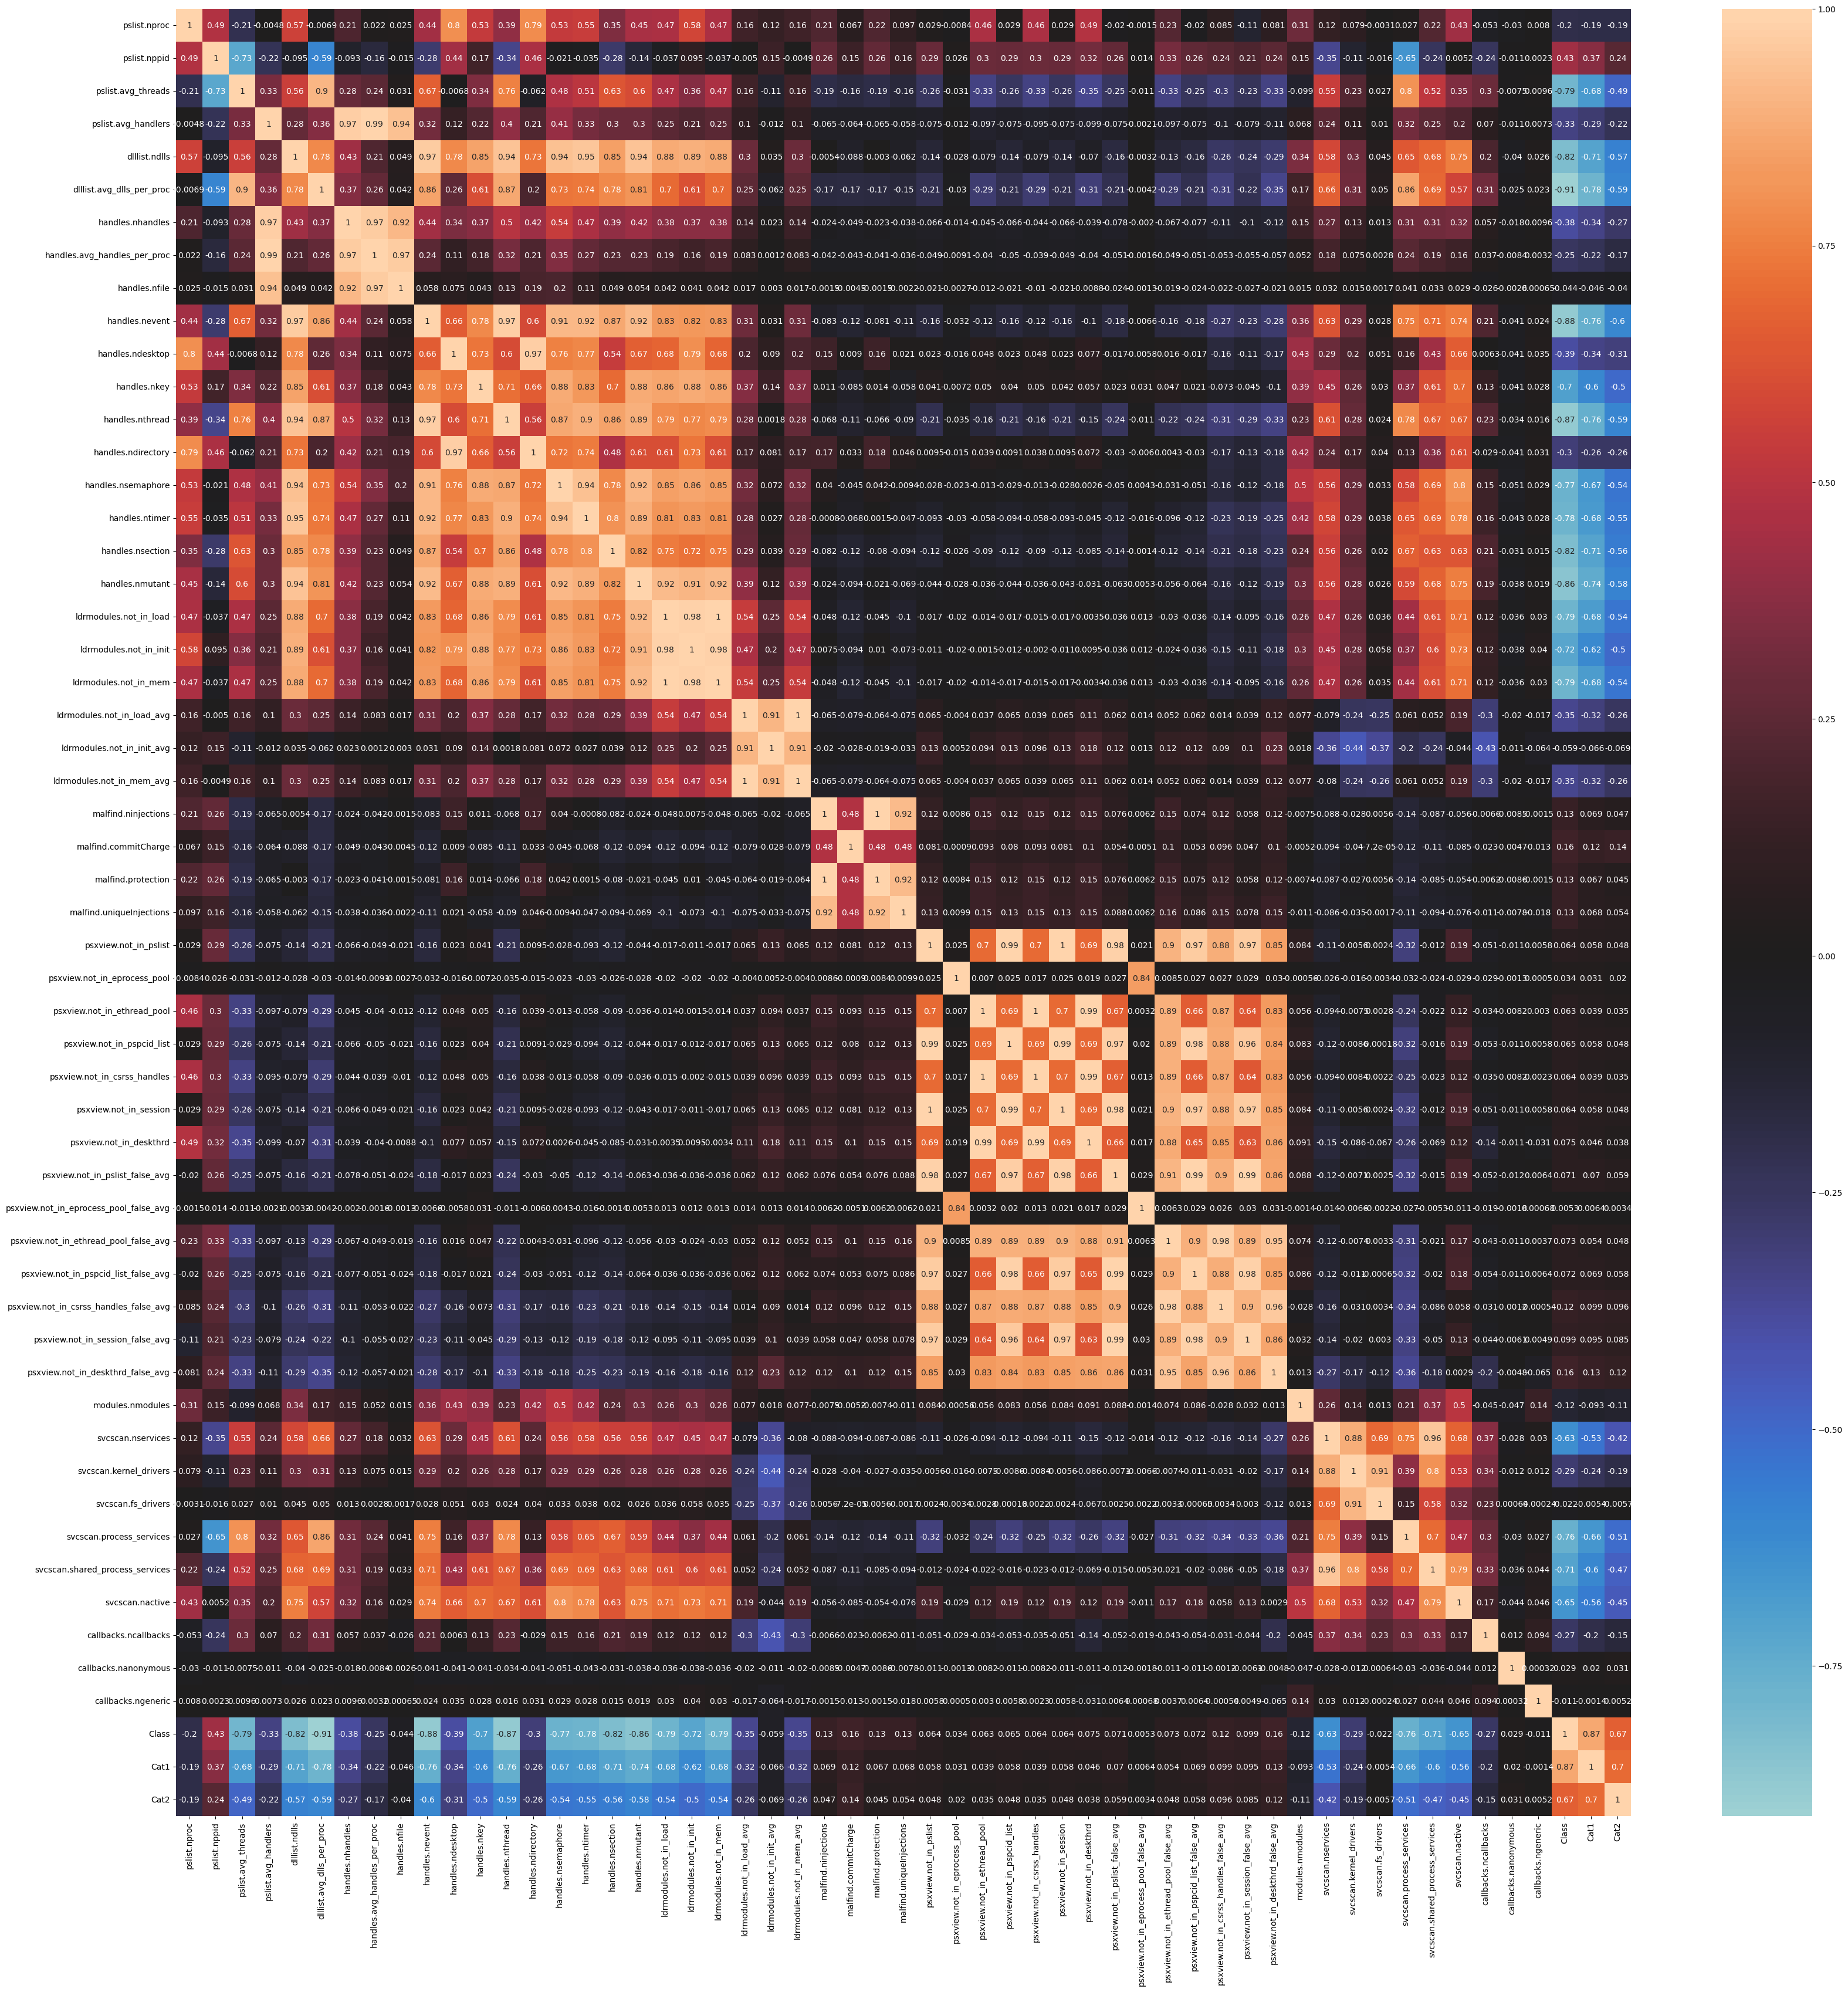

In [ ]:
# Get correlation for the feautes within the data dataframe
correlation_matrix = data.corr()

# Plot the associated feature correlation using seaborn's heatmap
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot=True, center=0)

In [ ]:
# Instantiate a list to append correlation values for later use
correlations = []

# Iterate through each feature to identify each features correlation to 'Class'
for feature in data.columns:

    # derive the correlation to the 'Class' feature
    corr = data['Class'].corr(data[feature]) * 100

    # add absolute values to make positive for comparison (regardless of positive or negative correlation)
    abs_corr = abs(corr)

    # append the correlation value to a list
    correlations.append(abs_corr)

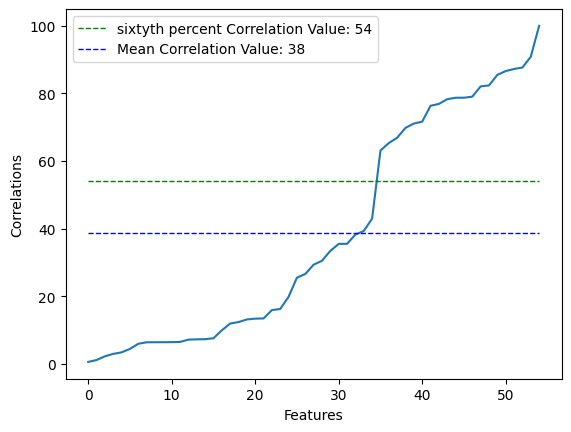

In [ ]:
# Prepare to plot correlation list for easier analysis
y = sorted(correlations)
X = [x for x in range(len(y))]

# format x and y values into dataframe for use with SNS lineplot
plt_data = pd.DataFrame({"Correlations":y, "Features":X})

# Determine the correlation mean and 4th Quantile threshold values for plotting
mean = np.mean(correlations)
sixtyth_per = np.quantile(correlations, 0.64)

# Plot the correlation values, along with the mean and fourth quantile thresholds
sb_plot = sns.lineplot(data=plt_data, y='Correlations', x = 'Features')

# Add line for 4th Quantile
sb_plot.hlines(y=sixtyth_per, xmin=min(X), xmax=max(X), linewidth=1, color='green', label=f'sixtyth percent Correlation Value: {int(sixtyth_per)}', ls='--')

# Add line for the mean
sb_plot.hlines(y=mean, xmin=min(X), xmax=max(X), linewidth=1, color='blue', label=f'Mean Correlation Value: {int(mean)}', ls='--')

plt.legend()
plt.show()

In [ ]:
high_correlation_threshold = sixtyth_per # equals 74

# Append to high correlation features to a list
hc_features = []

# Iterate through each feature to identify features with a high correlation to 'Class'
for feature in data.columns:

    corr = data['Class'].corr(data[feature]) * 100

    # add absolute to make positive for comparison (regardless of positive or negative correlation)
    abs_corr = abs(corr)

    if abs_corr > high_correlation_threshold:
        print('[*] {} : {} <---------------- High Correlation (> {:.2f}%)'.format(feature, corr, high_correlation_threshold))
        hc_features.append(feature)
    else:
        print('[*] {} : {}'.format(feature, corr))

[*] pslist.nproc : -19.837481909254528
[*] pslist.nppid : 42.941164500013855
[*] pslist.avg_threads : -79.06662320068575 <---------------- High Correlation (> 54.23%)
[*] pslist.avg_handlers : -33.409821936844665
[*] dlllist.ndlls : -82.39325407138024 <---------------- High Correlation (> 54.23%)
[*] dlllist.avg_dlls_per_proc : -90.85545402033198 <---------------- High Correlation (> 54.23%)
[*] handles.nhandles : -38.22695603229462
[*] handles.avg_handles_per_proc : -25.492465056628095
[*] handles.nfile : -4.3897028179077235
[*] handles.nevent : -87.67698233918229 <---------------- High Correlation (> 54.23%)
[*] handles.ndesktop : -39.291895649802214
[*] handles.nkey : -69.8239407290653 <---------------- High Correlation (> 54.23%)
[*] handles.nthread : -87.25312371303383 <---------------- High Correlation (> 54.23%)
[*] handles.ndirectory : -30.482260992416606
[*] handles.nsemaphore : -76.90968281938314 <---------------- High Correlation (> 54.23%)
[*] handles.ntimer : -78.313736715

In [ ]:
# Create new datafram with the highly correlated features
hc_data = pd.DataFrame(data[hc_features])
hc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pslist.avg_threads               58596 non-null  float64
 1   dlllist.ndlls                    58596 non-null  int64  
 2   dlllist.avg_dlls_per_proc        58596 non-null  float64
 3   handles.nevent                   58596 non-null  int64  
 4   handles.nkey                     58596 non-null  int64  
 5   handles.nthread                  58596 non-null  int64  
 6   handles.nsemaphore               58596 non-null  int64  
 7   handles.ntimer                   58596 non-null  int64  
 8   handles.nsection                 58596 non-null  int64  
 9   handles.nmutant                  58596 non-null  int64  
 10  ldrmodules.not_in_load           58596 non-null  int64  
 11  ldrmodules.not_in_init           58596 non-null  int64  
 12  ldrmodules.not_in_

<Axes: >

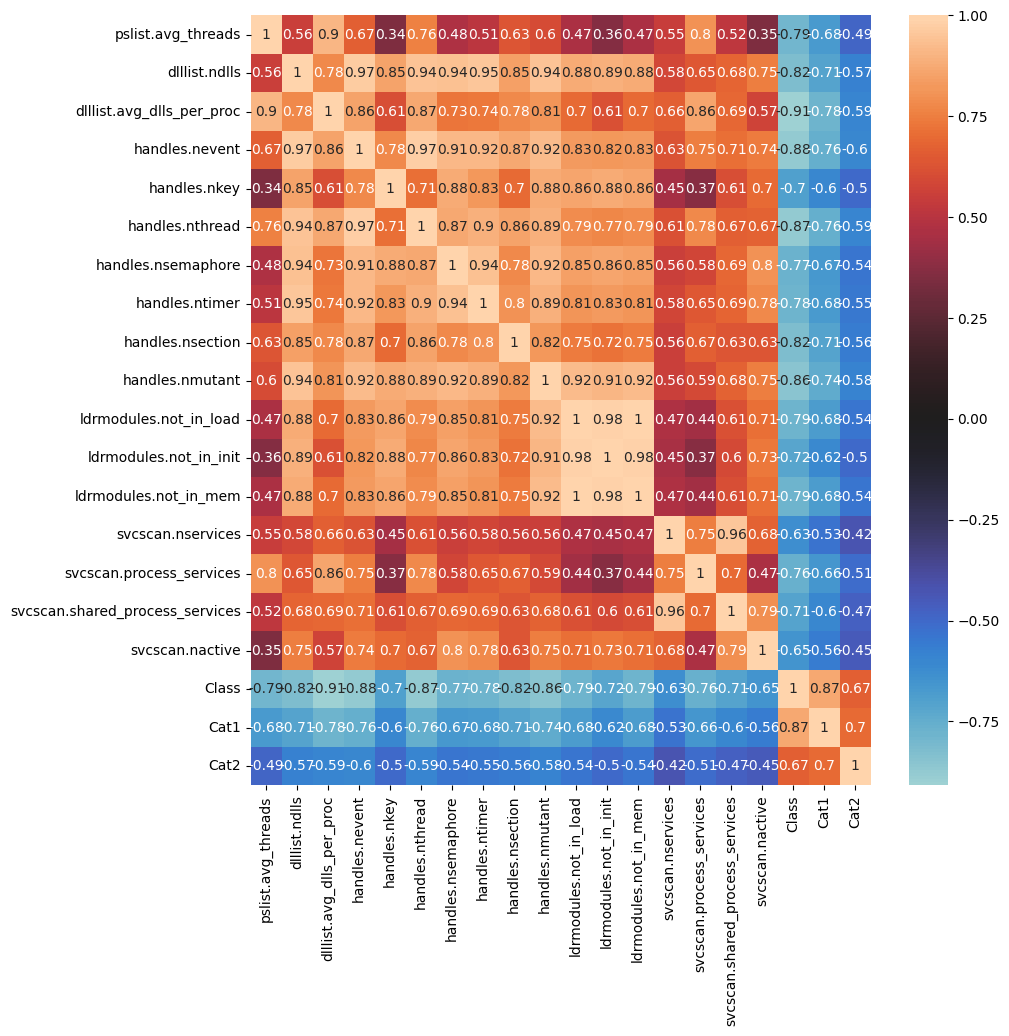

In [ ]:
# Get correlation for the feautes within the hc_data dataframe
correlation_matrix = hc_data.corr()

# Plot the associated feature correlation using seaborn's heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, center=0)

In [ ]:
x=hc_data.drop('Class',axis=1)
y=hc_data['Class']

**MODEL BUILDING**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, stratify=y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=9000)
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8790
           1       1.00      1.00      1.00      8789

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



<Axes: >

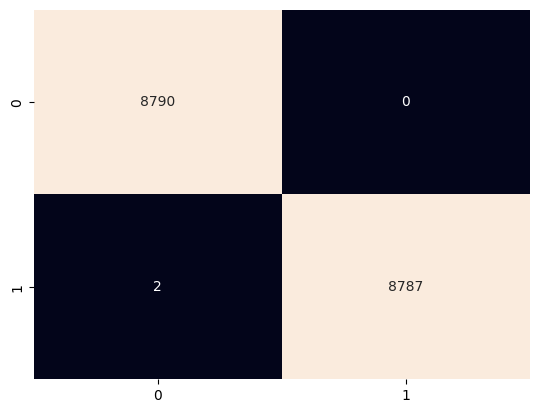

In [ ]:
p=log.predict(x_test)
m=confusion_matrix(y_test,p)
sns.heatmap(m, cbar= False, fmt='g', annot= True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max_k = 40
f1_scores = list()
error_rates = list()

for k in range(1, max_k):

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(x_train, y_train)

    y_pred1 = knn.predict(x_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred1), 4)))
    error = 1-round(accuracy_score(y_test, y_pred1), 4)
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8790
           1       1.00      1.00      1.00      8789

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1920x1440 with 0 Axes>

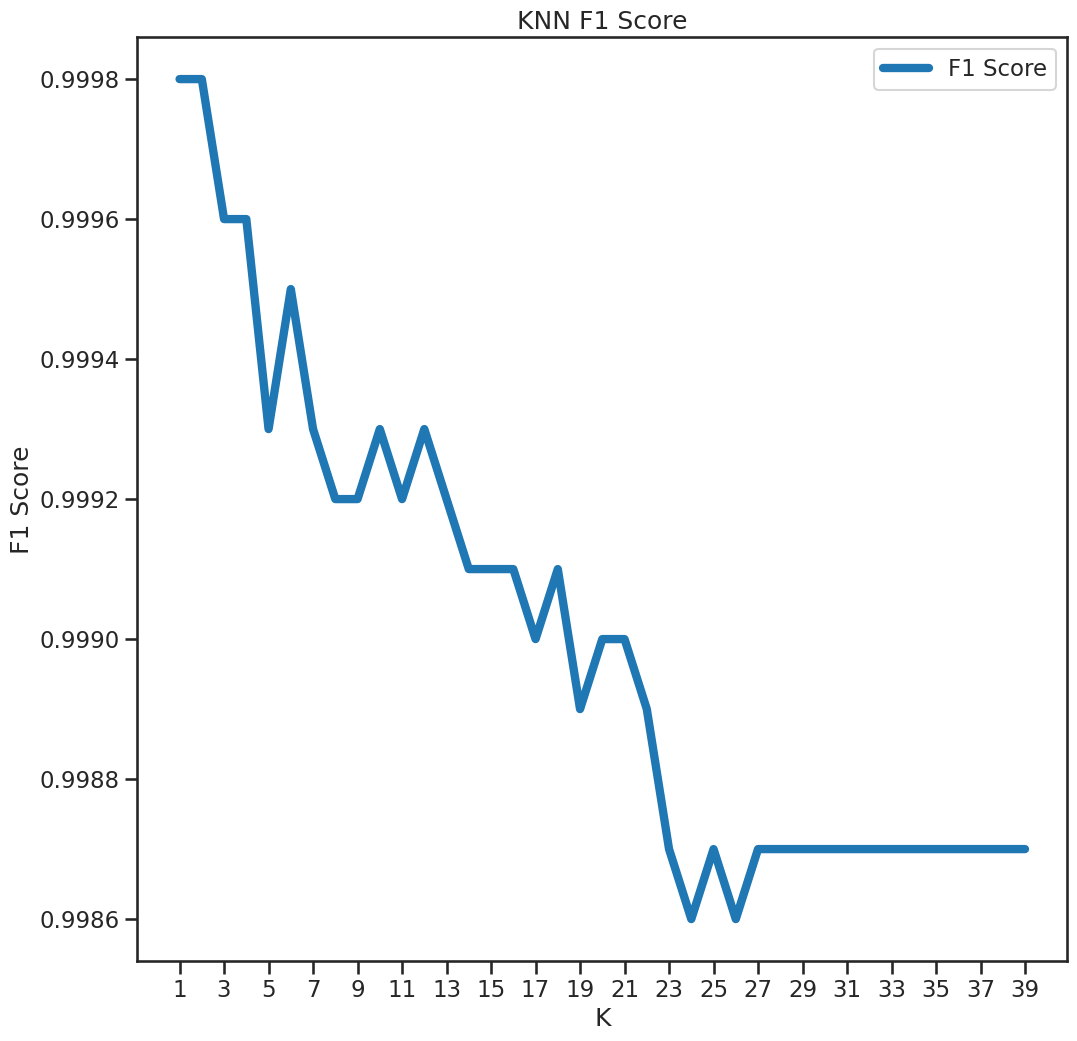

In [ ]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')


Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1920x1440 with 0 Axes>

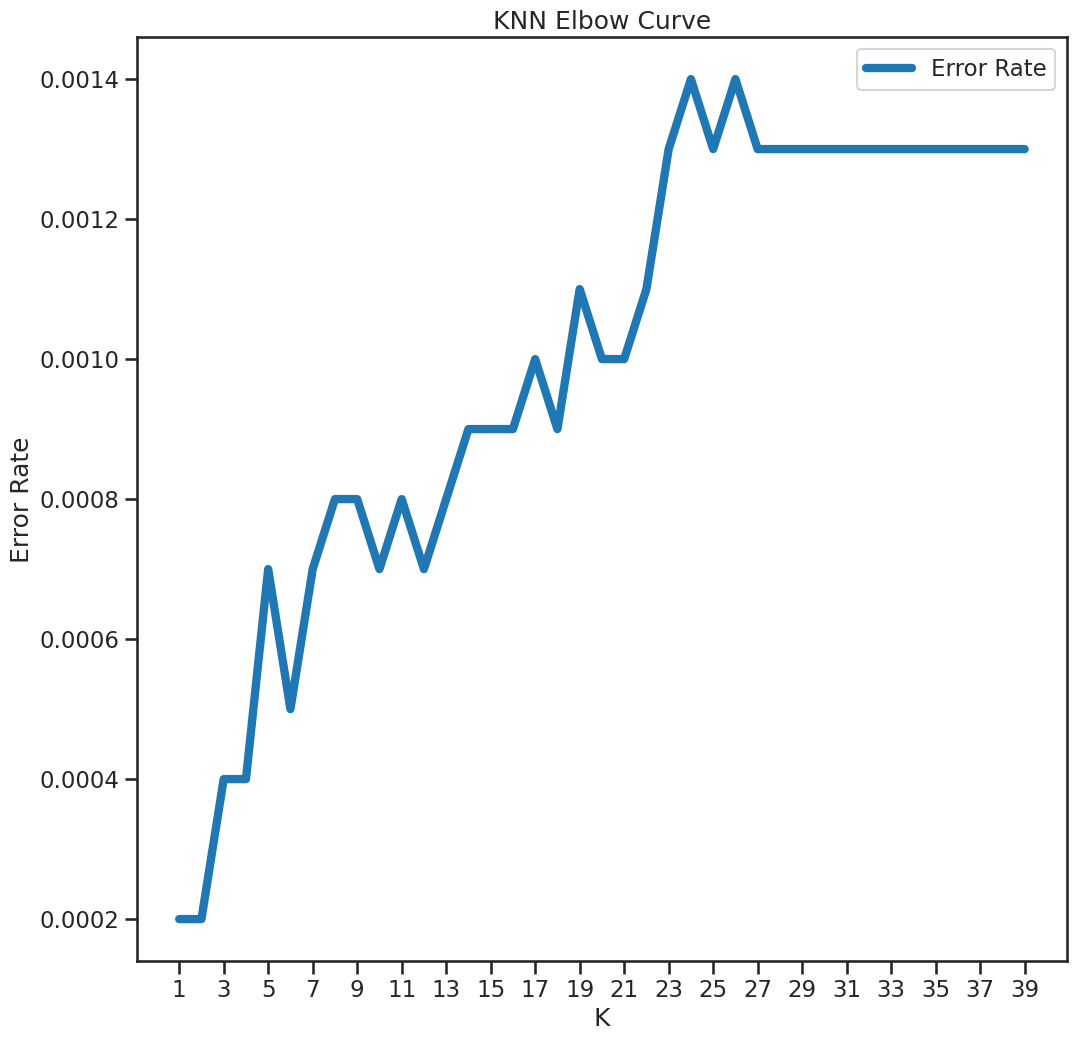

In [ ]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

tree_list = [15, 25, 50, 100, 200, 300, 400]

param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42),
                      param_grid=param_grid,
                      scoring='accuracy',
                      n_jobs=-1)

GV_GBC = GV_GBC.fit(x_train, y_train)

In [ ]:
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=2, n_estimators=300, random_state=42)

In [ ]:
y_pred2 = GV_GBC.predict(x_test)
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8790
           1       1.00      1.00      1.00      8789

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



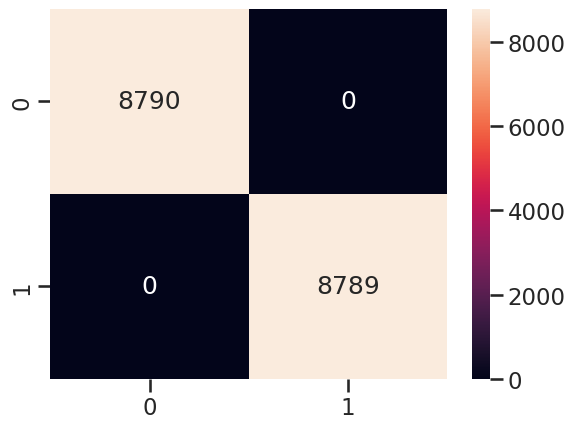

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred2)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

    RF.set_params(n_estimators=n_trees)

    RF.fit(x_train, y_train)

    oob_error = 1 - RF.oob_score_

    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.000463
20.0,0.000024
30.0,0.000000
40.0,0.000000
50.0,0.000000
100.0,0.000000
150.0,0.000000
200.0,0.000000
300.0,0.000000


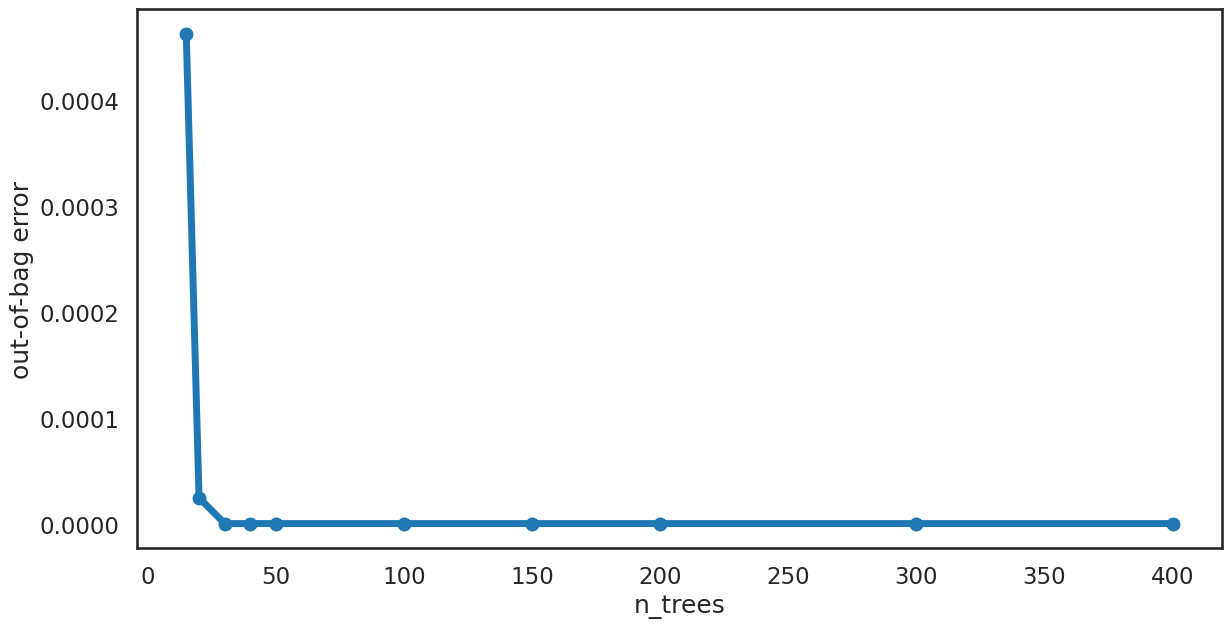

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [ ]:
with open('model1.pkl', 'wb') as file:
    pickle.dump(RF, file)

In [ ]:
with open('model2.pkl', 'wb') as file:
    pickle.dump(GV_GBC, file)

In [ ]:
with open('model3.pkl', 'wb') as file:
    pickle.dump(log, file)


Upon completing the data preprocessing phase, which involved rigorous cleaning and transformation processes, our dataset was distilled down to 20 pertinent features. These features formed the foundation for training a suite of machine learning models: Logistic Regression, K-Nearest Neighbors (KNN), Gradient Boosting, and Random Forest. A notable parameter setting across these models was the implementation of a maximum iteration (max_iter) limit of 9000, particularly relevant for logistic regression to ensure convergence.

The performance metrics for these models were exceptionally high, with each model achieving a 100% accuracy score across all test datasets. Such a high level of accuracy is unusual in practical scenarios and might indicate overfitting or a lack of diversity in the test data.

In the case of the KNN algorithm, an interesting inverse relationship was observed between the number of neighbors (k) and the F1 score, as well as with the error rate. This trend was elucidated through a detailed graphical representation. Typically, as k increases, the model becomes more robust against noise but loses precision in classification boundaries, which can explain the observed trend.

For the Gradient Boosting classifier, a comprehensive hyperparameter tuning was conducted using GridSearchCV. This process involved experimenting with various configurations of learning rates, subsample sizes, and the maximum number of features. The optimal model was identified with 'max_features' set to 2, 'n_estimators' at 300, and a 'random_state' of 42, achieving 100% accuracy. Such a high level of accuracy, while impressive, should be approached with caution as it may not generalize well to unseen data.

Similarly, the Random Forest model demonstrated a 100% accuracy score. Initial errors in this model's performance were attributed to insufficient convergence during the early stages of configuration, underscoring the importance of adequate model training.

For future research directions, a more nuanced approach to feature engineering is suggested. This process could involve generating new features, selecting more relevant features, or transforming existing features to better capture the underlying patterns in the data. Additionally, exploring advanced machine learning techniques such as neural networks is recommended. Neural networks, particularly deep learning models, could potentially unveil complex nonlinear relationships within the data that simpler models may miss.